# Data Mining Final Project

## Pokemon Legendary Predictions

##### The goal of this project is based on the current list of legendary Pokemon's and their statistics, can we predict other Pokemon's that are legendary as well?

In [19]:
#Importing all required libraries
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
pd.set_option('display.max_columns', None)
cleaned = pd.read_csv('Pokemon_cleaned.csv', index_col=0)
cleaned.head(3)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0


## Understanding the Correlation between X & Legendary

In [21]:
cleaned.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'is_legendary'],
      dtype='object')

In [67]:
stats_x = cleaned[['attack', 'speed', 'defense', 'hp', 'sp_attack',
       'sp_defense']]
stats_y = cleaned[['is_legendary']]
stats = cleaned[['name','is_legendary','attack', 'speed', 'defense', 'hp', 'sp_attack',
       'sp_defense']]

In [208]:
others = cleaned[['is_legendary','height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate']]

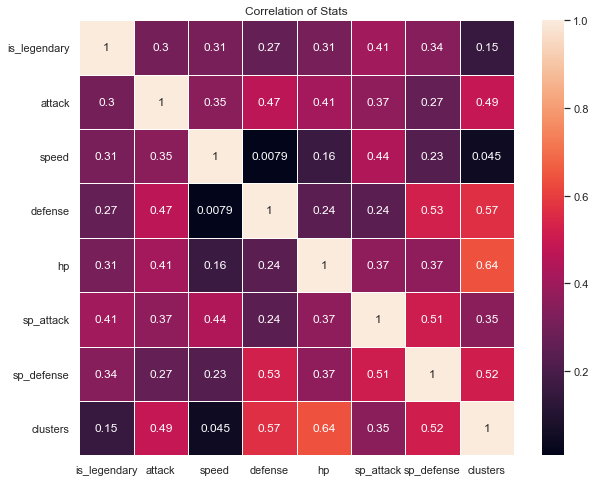

In [196]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(stats.corr(), annot = True, linewidth=1, linecolor='w', square=True)
plt.title('Correlation of Stats')
plt.show()

Based from this we can see that the highest correlation within the basic statistics to legendary is special attack, following with special_defense, there is not much correlation with legendary and defense, and attack doesn't seem to matter to much as well. 

Some other interesting areas include defense correlating with special defense, special attack correlating with special defense.

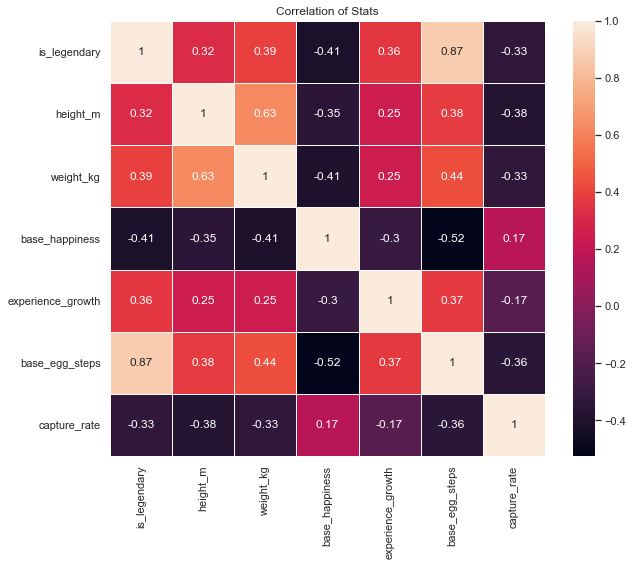

In [209]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(others.corr(), annot = True, linewidth=1, linecolor='w', square=True)
plt.title('Correlation of Stats')
plt.show()

Based on this correlation heat map, we see that base_egg_steps has a really high correlation, following by weight height and experience growth showing around the same. As for happiness, we see that there is a negative correlation, the more happy it is, the less chance it has in becoming a legendary pokemon.

Some intereting points include, base egg steps is correlated with weights, and experience growth isn't necessarily correlated with anything.

## KMeans with Base Statistics

stats_x = cleaned[['attack', 'speed', 'defense', 'hp', 'sp_attack',
       'sp_defense']]

stats_y = cleaned[['is_legendary']]

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

#Scaling all
scale = StandardScaler()
scaled_stats = scale.fit_transform(stats_x)

wcss = []

max_clusters = 15

for i in range(1, max_clusters):
    kmeans_stats = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans_stats.fit(scaled_stats)
    wcss.append(kmeans_stats.inertia_)

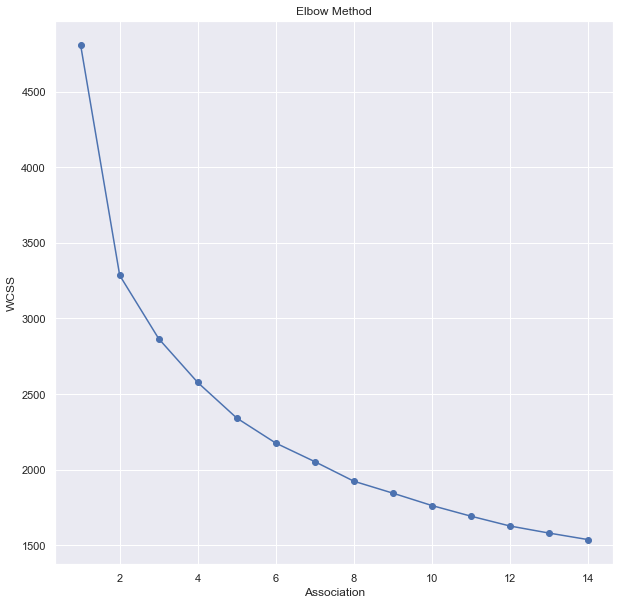

In [74]:
#Plotting the results onto a line graph to observe 'The elbow'
sns.set(rc={'figure.figsize':(10,10)})
plt.plot(range(1, max_clusters), wcss)
plt.scatter(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Seems like 5 or 6 might be the best cluster for KMeans, in this case we will be using 5

In [139]:
#Plotting the Kmeans on 5 Clusters
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=10)
kmeans.fit(scaled_stats)
stats["clusters"] = kmeans.labels_

Centroids = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids.columns = ['attack', 'speed', 'defense', 'hp', 'sp_attack', 'sp_defense']
Centroids["clusters"] = [1,2,3,4,5]

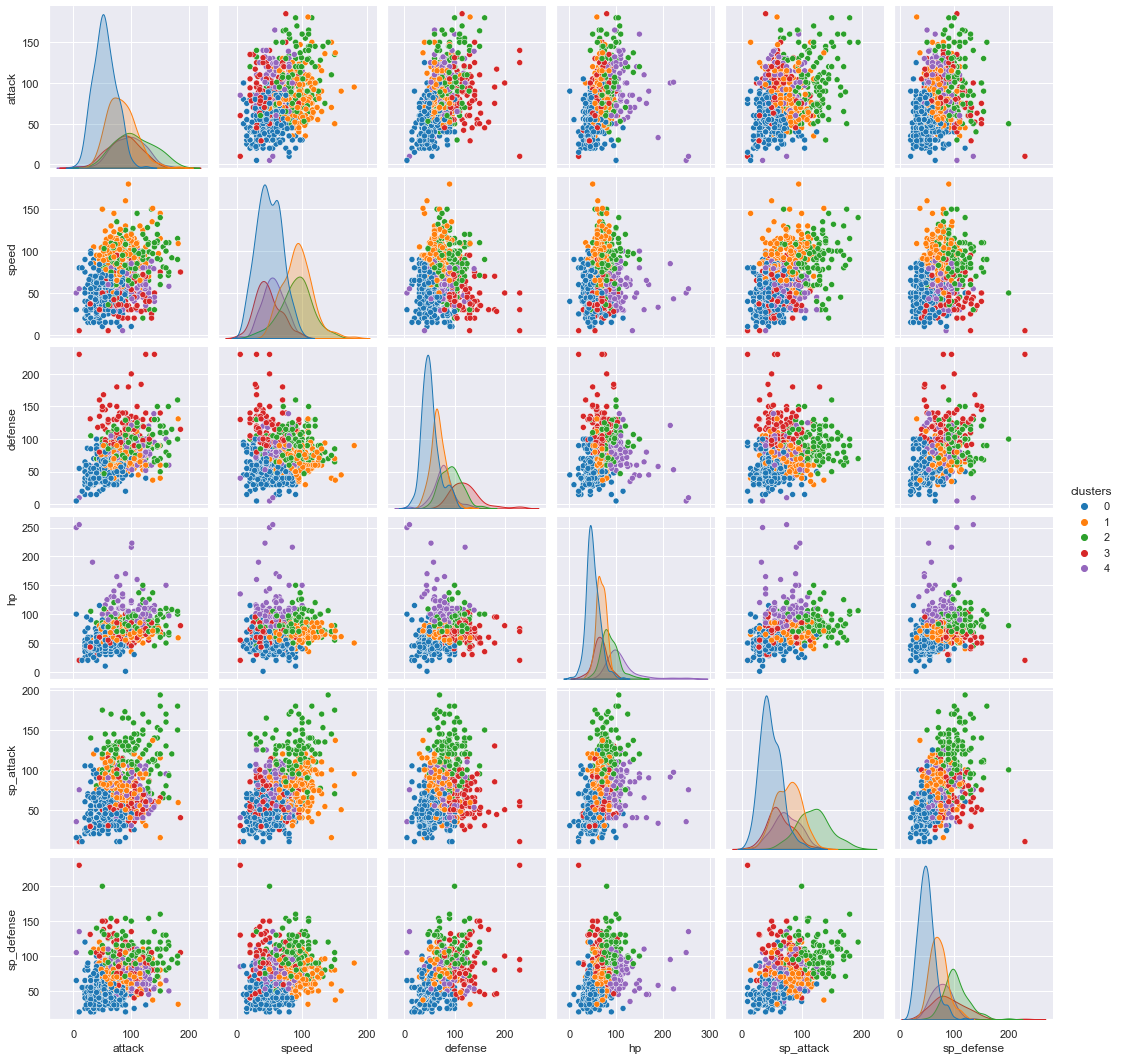

In [125]:
#Plotting the Kmeans on Base Stats of Pokemon
sns.set(rc={'figure.figsize':(2,2)})
sns.pairplot(stats[['attack', 'speed', 'defense', 'hp', 'sp_attack', 'sp_defense', 'clusters']], hue = "clusters", palette = "tab10")

Based on this pairplot, we can clearly see that Cluster 0 tends to be weaker pokemons, and then other Clusters from 1-4 all of their strengths. On average cluster 2 seems to seperate the most away from cluster 0.

To better understand the clusters, we can use the centroids and evaluate the mean of each column feature

In [140]:
Centroids = Centroids.astype(int)

In [141]:
Centroids = Centroids.set_index('clusters')

In [118]:
Centroids_1 = Centroids.filter(items = [1], axis=0)
C_1_Columns = Centroids_1.columns
C_1_Values  = Centroids_1.values[0].tolist()
Centroids_2 = Centroids.filter(items = [2], axis=0)
C_2_Columns = Centroids_2.columns
C_2_Values  = Centroids_2.values[0].tolist()
Centroids_3 = Centroids.filter(items = [3], axis=0)
C_3_Columns = Centroids_3.columns
C_3_Values  = Centroids_3.values[0].tolist()
Centroids_4 = Centroids.filter(items = [4], axis=0)
C_4_Columns = Centroids_4.columns
C_4_Values  = Centroids_4.values[0].tolist()
Centroids_5 = Centroids.filter(items = [5], axis=0)
C_5_Columns = Centroids_5.columns
C_5_Values  = Centroids_5.values[0].tolist()

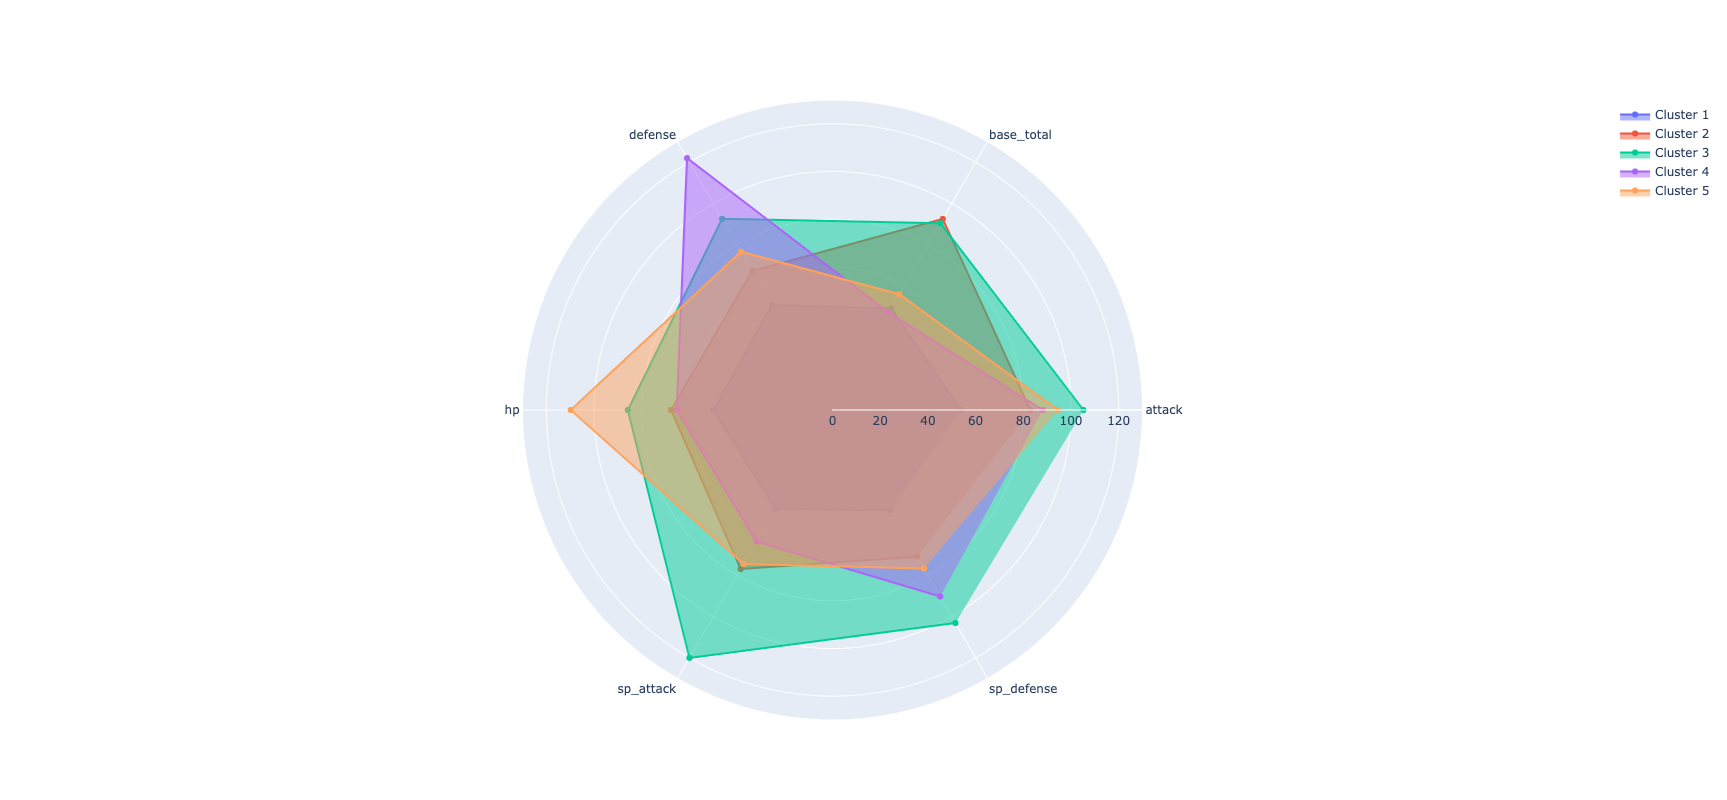

In [148]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= C_1_Values,
      theta=C_1_Columns,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r= C_2_Values,
      theta=C_2_Columns,
      fill='toself',
      name='Cluster 2'
))

fig.add_trace(go.Scatterpolar(
      r= C_3_Values,
      theta=C_3_Columns,
      fill='toself',
      name='Cluster 3'
))

fig.add_trace(go.Scatterpolar(
      r= C_4_Values,
      theta=C_4_Columns,
      fill='toself',
      name='Cluster 4'
))

fig.add_trace(go.Scatterpolar(
      r= C_5_Values,
      theta=C_5_Columns,
      fill='toself',
      name='Cluster 5'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=800, 
    height=800
)
fig.show()

In [189]:
#Plotting Clusters Stats Comparison for Better Understanding
import ipywidgets as ipw

fig = go.FigureWidget()

fig.add_trace(go.Scatterpolar(
      r= C_1_Values,
      theta=C_1_Columns,
      fill='toself',
      name='Cluster 1'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=500, 
    height=500,
    title = "Weak Pokemons (Poor Stats)"
)

fig2 = go.FigureWidget()
fig2.add_trace(go.Scatterpolar(
      r= C_2_Values,
      theta=C_2_Columns, line_color = "red",
      fill='toself',
      name='Cluster 2'
))

fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=500, 
    height=500,
    title = "Speed Pokemons"
)

fig3 = go.FigureWidget()
fig3.add_trace(go.Scatterpolar(
      r= C_3_Values,
      theta=C_3_Columns, line_color = "green",
      fill='toself',
      name='Cluster 3'
))

fig3.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=500, 
    height=500,
    title = "Powerful Pokemons (Well Rounded)"
)

fig4 = go.FigureWidget()
fig4.add_trace(go.Scatterpolar(
      r= C_4_Values,
      theta=C_4_Columns, line_color = "purple",
      fill='toself',
      name='Cluster 4'
))

fig4.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=500, 
    height=500, 
    title = "Defensive Pokemons (Low Speed)"
)

fig5 = go.FigureWidget()
fig5.add_trace(go.Scatterpolar(
      r= C_5_Values,
      theta=C_5_Columns, line_color = "orange",
      fill='toself',
      name='Cluster 5'
))

fig5.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True,
    width=500, 
    height=500,
    title = "High HP Pokemons (Low Speed)"
)

fig_subplots=  ipw.VBox([ipw.HBox([fig, fig2, fig3]), ipw.HBox([fig4,fig5])])
fig_subplots

    'data': [{'fill': 'toself',
              'name': 'Cluster 1'…

## KMeans with Other Factors

In [228]:
others = cleaned[['is_legendary','height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', "capture_rate"]]
others_y = cleaned[['is_legendary']]
others_non_legendary = others[others['is_legendary']==0]
others_x = cleaned[['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate']]
others_x_nl = others_non_legendary[['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate']]

In [211]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

#Scaling all
scale = StandardScaler()
scaled_others = scale.fit_transform(others_x)

wcss_others = []

max_clusters = 15

for i in range(1, max_clusters):
    kmeans_others = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans_others.fit(scaled_others)
    wcss_others.append(kmeans_others.inertia_)

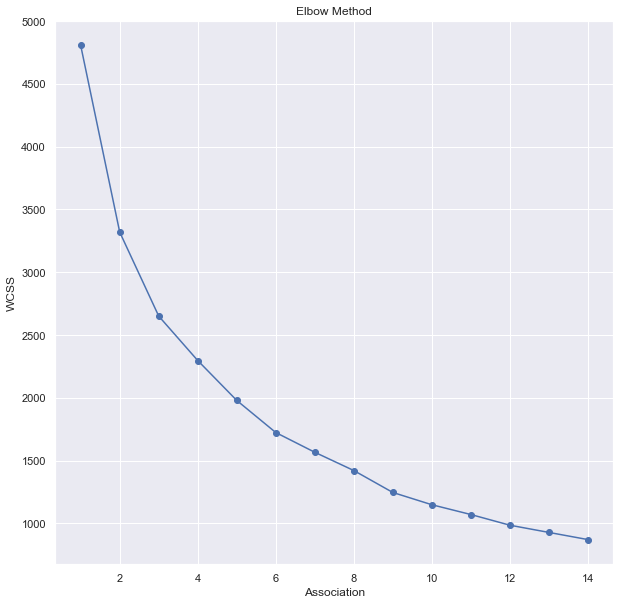

In [212]:
#Plotting the results onto a line graph to observe 'The elbow'
sns.set(rc={'figure.figsize':(10,10)})
plt.plot(range(1, max_clusters), wcss_others)
plt.scatter(range(1, max_clusters), wcss_others)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Choosing 5 as the Cluster Point

In [223]:
#Plotting the Kmeans on 5 Clusters
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=10)
kmeans.fit(scaled_others)
others["clusters"] = kmeans.labels_

Centroids_o = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids_o.columns = ['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate']
Centroids_o["clusters"] = [1,2,3,4,5]

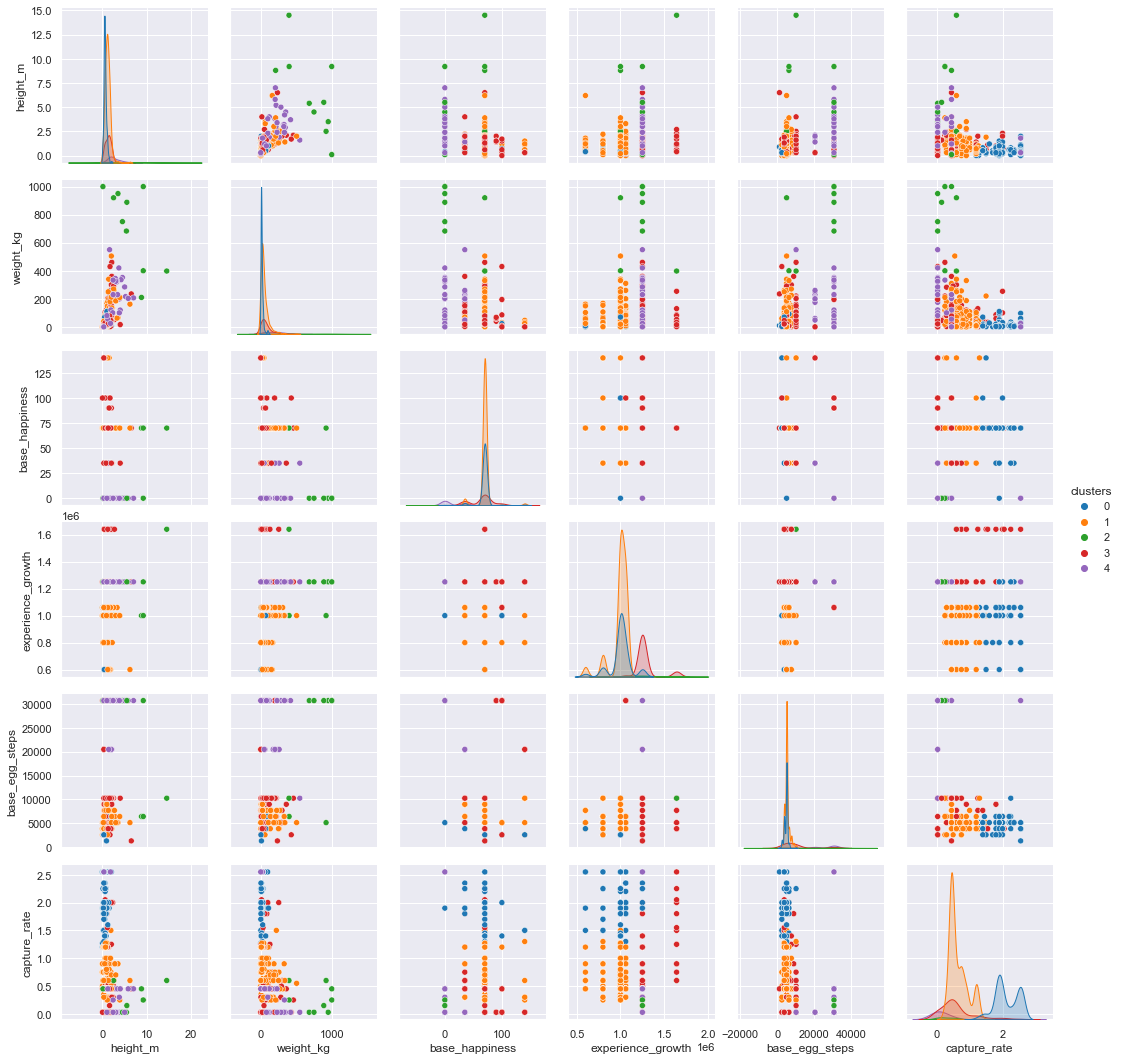

In [224]:
#Plotting the Kmeans on Base Stats of Pokemon
sns.set(rc={'figure.figsize':(2,2)})
sns.pairplot(others[['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate', 'clusters']], hue = "clusters", palette = "tab10")

There is an inbalance of data set seperation in the following features, base_egg_steps, experience_growth, base_happiness, weight_kg, and height_m, potentially need to bin and altered

In [225]:
Centroids_o = Centroids_o

In [226]:
Centroids_o = Centroids_o.set_index('clusters')

In [227]:
Centroids_o

,height_m,weight_kg,base_happiness,experience_growth,base_egg_steps,capture_rate
clusters,,,,,,
1,0.535266,13.253623,69.444444,1.001130e+06,4705.700483,2.116280
2,1.107656,49.045933,69.473684,9.896610e+05,5230.239234,0.641938
3,6.320000,719.880000,28.000000,1.214000e+06,21248.000000,0.284000
4,1.304065,76.256911,66.422764,1.286582e+06,9917.398374,0.580407
5,2.595349,188.679070,11.395349,1.250000e+06,27147.906977,0.226977


## Non Legendary Other Feature on Pokemon Analysis

In [229]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

#Scaling all
scale = StandardScaler()
scaled_others = scale.fit_transform(others_x_nl)

wcss_others = []

max_clusters = 15

for i in range(1, max_clusters):
    kmeans_others = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans_others.fit(scaled_others)
    wcss_others.append(kmeans_others.inertia_)

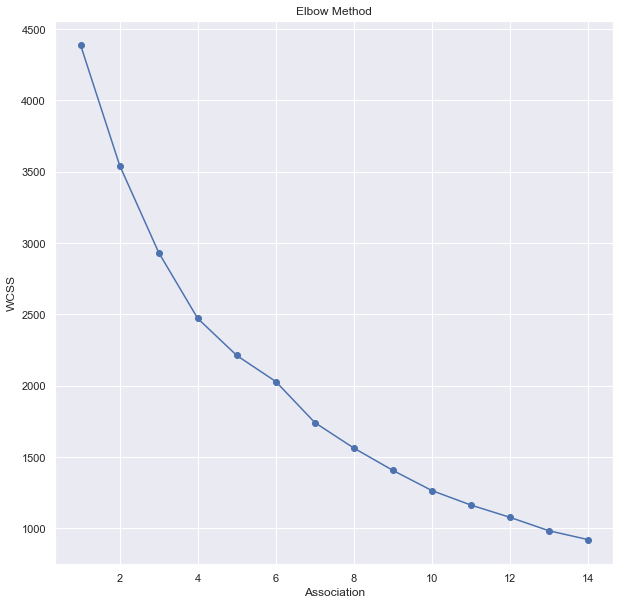

In [230]:
#Plotting the results onto a line graph to observe 'The elbow'
sns.set(rc={'figure.figsize':(10,10)})
plt.plot(range(1, max_clusters), wcss_others)
plt.scatter(range(1, max_clusters), wcss_others)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Choosing 5 as the Cluster Point

In [232]:
#Plotting the Kmeans on 5 Clusters
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=10)
kmeans.fit(scaled_others)
others_non_legendary["clusters"] = kmeans.labels_

Centroids_o = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids_o.columns = ['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate']
Centroids_o["clusters"] = [1,2,3,4,5]

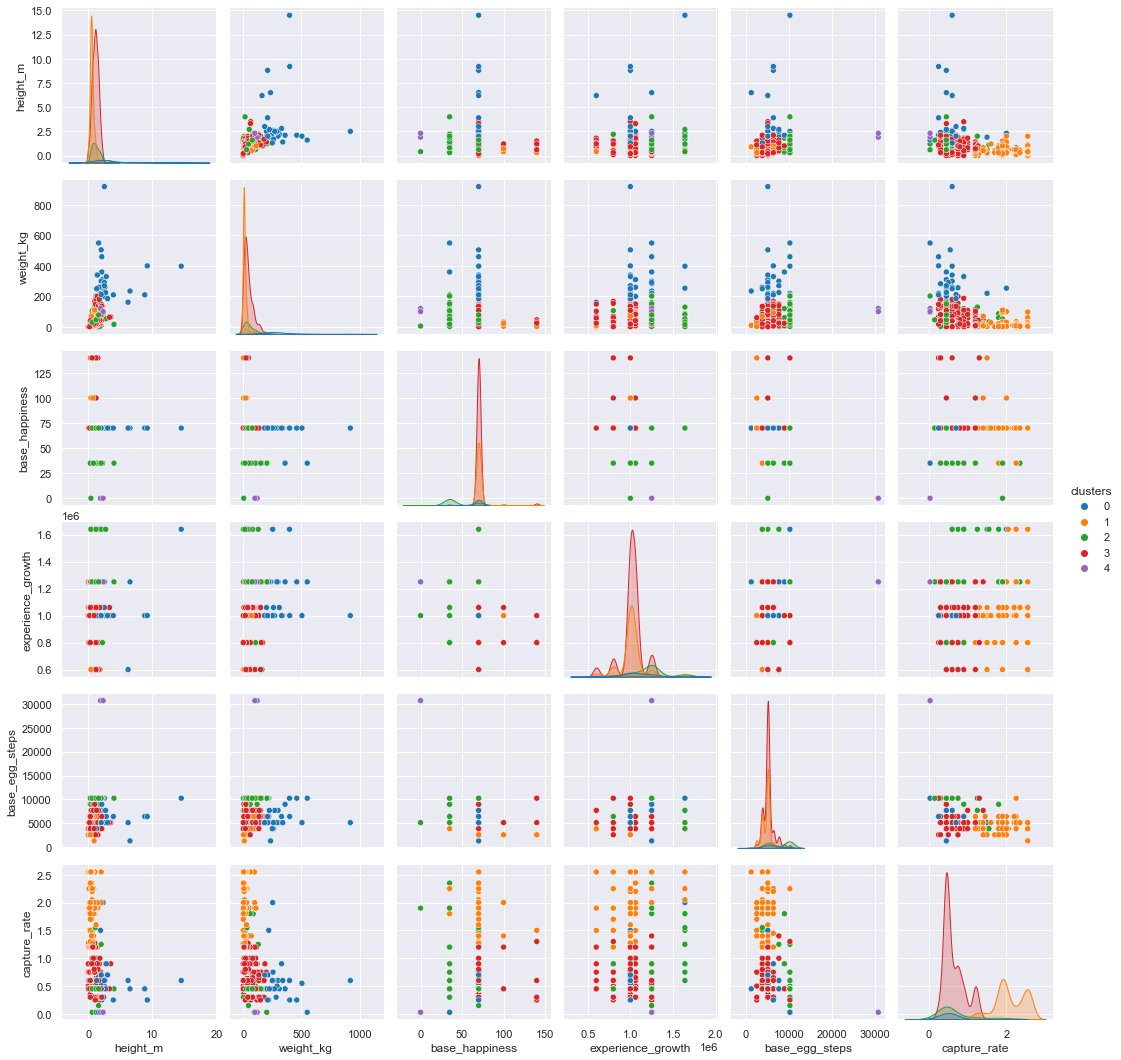

In [233]:
#Plotting the Kmeans on Base Stats of Pokemon
sns.set(rc={'figure.figsize':(2,2)})
sns.pairplot(others_non_legendary[['height_m','weight_kg','base_happiness','experience_growth','base_egg_steps', 'capture_rate', 'clusters']], hue = "clusters", palette = "tab10")

There is an inbalance of data set seperation in the following features, base_egg_steps, experience_growth, base_happiness, weight_kg, and height_m, potentially need to bin and altered

In [234]:
Centroids_o = Centroids_o

In [235]:
Centroids_o = Centroids_o.set_index('clusters')

In [236]:
Centroids_o

,height_m,weight_kg,base_happiness,experience_growth,base_egg_steps,capture_rate
clusters,,,,,,
1,3.376667,309.886667,67.666667,1.110319e+06,6186.666667,0.572667
2,0.534419,13.190233,70.441860,1.007040e+06,4685.395349,2.081349
3,1.153425,53.741096,44.589041,1.223270e+06,7820.273973,0.696712
4,1.087591,43.563260,70.997567,1.013382e+06,5197.858881,0.637981
5,2.100000,110.500000,0.000000,1.250000e+06,30720.000000,0.030000
